In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder

In [17]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Naive Bayes

30-01-2022  00:55    <DIR>          .
29-01-2022  22:26    <DIR>          ..
30-01-2022  00:35    <DIR>          .ipynb_checkpoints
29-01-2022  22:16               617 Problem_statement(salary_data).txt
29-01-2022  22:19         1,694,474 SalaryData_Test.csv
29-01-2022  22:25         3,393,618 SalaryData_Train.csv
30-01-2022  00:55            15,312 Untitled.ipynb
               4 File(s)      5,104,021 bytes
               3 Dir(s)  214,365,761,536 bytes free


## Salary

### Preparing Training Data

In [18]:
salary_train = pd.read_csv('SalaryData_Train.csv')

In [19]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [43]:
le = LabelEncoder()
salary_train.workclass = le.fit_transform(salary_train.workclass)
salary_train.maritalstatus = le.fit_transform(salary_train.maritalstatus)
salary_train.occupation = le.fit_transform(salary_train.occupation)
salary_train.relationship = le.fit_transform(salary_train.relationship)
salary_train.race = le.fit_transform(salary_train.race)
salary_train.sex = le.fit_transform(salary_train.sex)
salary_train.native = le.fit_transform(salary_train.native)

In [38]:
salary_train.drop(['education'], inplace = True, axis = 1)

In [39]:
salary_train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,9,4,0,3,4,1,0,0,20,37,<=50K


<AxesSubplot:xlabel='Salary', ylabel='age'>

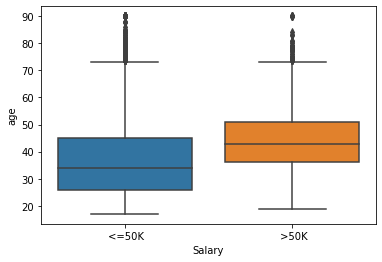

In [32]:
sns.boxplot(x = 'Salary', y ='age', data = salary_train)

<AxesSubplot:xlabel='Salary', ylabel='capitalgain'>

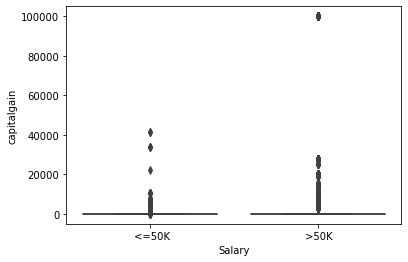

In [33]:
sns.boxplot(x = 'Salary', y ='capitalgain', data = salary_train)

<AxesSubplot:xlabel='Salary', ylabel='capitalloss'>

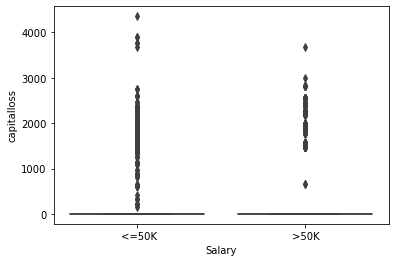

In [34]:
sns.boxplot(x = 'Salary', y ='capitalloss', data = salary_train)

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

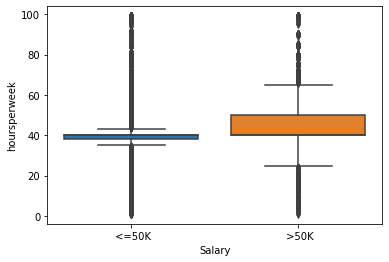

In [35]:
sns.boxplot(x = 'Salary', y ='hoursperweek', data = salary_train)

### Preparing Test Data

In [64]:
salary_test = pd.read_csv('SalaryData_Test.csv')

In [65]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [66]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [67]:
salary_test.drop(['education'], inplace =True, axis = 1)

In [68]:
le = LabelEncoder()
salary_test.workclass = le.fit_transform(salary_test.workclass)
salary_test.maritalstatus = le.fit_transform(salary_test.maritalstatus)
salary_test.occupation = le.fit_transform(salary_test.occupation)
salary_test.relationship = le.fit_transform(salary_test.relationship)
salary_test.race = le.fit_transform(salary_test.race)
salary_test.sex = le.fit_transform(salary_test.sex)
salary_test.native = le.fit_transform(salary_test.native)

In [70]:
salary_test

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,13,0,0,3,1,1,5455,0,40,37,<=50K


### Applying naive Bayes Classifier

#### Gaussian - Applied to continuos Features

In [71]:
X_trainG = salary_train[['age','capitalgain','capitalloss','hoursperweek']]
Y_trainG = salary_train['Salary']
X_testG = salary_test[['age','capitalgain','capitalloss','hoursperweek']]
Y_testG = salary_test['Salary']

In [72]:
modelG = GaussianNB()
modelG = modelG.fit(X_trainG, Y_trainG)

In [73]:
Y_testG_pred = modelG.predict(X_testG)
metrics.accuracy_score(Y_testG, Y_testG_pred)

0.7883134130146082

##### One feature at a time

In [74]:
for i in salary_train[['age','capitalgain','capitalloss','hoursperweek']]:
    modelG1 = GaussianNB()
    modelG1 = modelG1.fit(X_trainG[[i]], Y_trainG)
    Y_testG1_pred = modelG1.predict(X_testG[[i]])
    print('accuracy of',i,metrics.accuracy_score(Y_testG, Y_testG1_pred))

accuracy of age 0.7543160690571049
accuracy of capitalgain 0.7860557768924302
accuracy of capitalloss 0.7555112881806109
accuracy of hoursperweek 0.7543160690571049


##### Two features at a time

In [82]:
import itertools

In [84]:
for i in itertools.combinations(salary_train[['age','capitalgain','capitalloss','hoursperweek']],2):
    modelG2 = GaussianNB()
    modelG2 = modelG2.fit(X_trainG[list(i)], Y_trainG)
    Y_testG2_pred = modelG2.predict(X_testG[list(i)])
    print('accuracy of', i, metrics.accuracy_score(Y_testG, Y_testG2_pred))

accuracy of ('age', 'capitalgain') 0.7865205843293492
accuracy of ('age', 'capitalloss') 0.7553784860557768
accuracy of ('age', 'hoursperweek') 0.7549800796812749
accuracy of ('capitalgain', 'capitalloss') 0.7893094289508632
accuracy of ('capitalgain', 'hoursperweek') 0.7863877822045152
accuracy of ('capitalloss', 'hoursperweek') 0.7553784860557768


#### Multinomial - Applied to Categorical Features

In [78]:
X_trainM = salary_train[['workclass','educationno','maritalstatus','occupation','relationship','race','sex','native']]
Y_trainM = salary_train['Salary']
X_testM = salary_test[['workclass','educationno','maritalstatus','occupation','relationship','race','sex','native']]
Y_testM = salary_test['Salary']

In [79]:
modelM = MultinomialNB()
modelM = modelM.fit(X_trainM, Y_trainM)

In [80]:
Y_testM_pred = modelM.predict(X_testM)
metrics.accuracy_score(Y_testM, Y_testM_pred)

0.7879150066401063

##### One feature at a time

In [81]:
for i in salary_train[['workclass','educationno','maritalstatus','occupation','relationship','race','sex','native']]:
    modelM1 = MultinomialNB()
    modelM1 = modelM1.fit(X_trainM[[i]], Y_trainM)
    Y_testM1_pred = modelM1.predict(X_testM[[i]])
    print('accuracy of',i,metrics.accuracy_score(Y_testM, Y_testM1_pred))

accuracy of workclass 0.7543160690571049
accuracy of educationno 0.7543160690571049
accuracy of maritalstatus 0.7543160690571049
accuracy of occupation 0.7543160690571049
accuracy of relationship 0.7543160690571049
accuracy of race 0.7543160690571049
accuracy of sex 0.7543160690571049
accuracy of native 0.7543160690571049


##### Two features at a time

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
for i in itertools.combinations(salary_train[['workclass','educationno','maritalstatus','occupation','relationship','race','sex','native']],2):
    modelM2 = MultinomialNB()
    modelM2 = modelM2.fit(X_trainM[list(i)], Y_trainM)
    Y_testM2_pred = modelG2.predict(X_testM[list(i)])
    print('accuracy of', i, metrics.accuracy_score(Y_testM, Y_testM2_pred))

accuracy of ('workclass', 'educationno') 0.7543160690571049
accuracy of ('workclass', 'maritalstatus') 0.7543160690571049
accuracy of ('workclass', 'occupation') 0.7543160690571049
accuracy of ('workclass', 'relationship') 0.7543160690571049
accuracy of ('workclass', 'race') 0.7543160690571049
accuracy of ('workclass', 'sex') 0.7543160690571049
accuracy of ('workclass', 'native') 0.7543160690571049
accuracy of ('educationno', 'maritalstatus') 0.7543160690571049
accuracy of ('educationno', 'occupation') 0.7543160690571049
accuracy of ('educationno', 'relationship') 0.7543160690571049
accuracy of ('educationno', 'race') 0.7543160690571049
accuracy of ('educationno', 'sex') 0.7543160690571049
accuracy of ('educationno', 'native') 0.7543160690571049
accuracy of ('maritalstatus', 'occupation') 0.7543160690571049
accuracy of ('maritalstatus', 'relationship') 0.7543160690571049
accuracy of ('maritalstatus', 'race') 0.7543160690571049
accuracy of ('maritalstatus', 'sex') 0.7543160690571049
acc